<a href="https://colab.research.google.com/github/sojith29034/DNA-Sequencing/blob/main_branch/DNA_Sequencing_Mod1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic string operations in python

In [1]:
seq1 = 'ATGC'
seq2 = 'ATGC'
print(seq1 + seq2)

ATGCATGC


In [2]:
base = "ACGT"
print(base)

ACGT


In [3]:
import random
random.choice(base)

'C'

In [4]:
random.seed(1)      # so that the random choice does not change
random.choice(base)

'C'

In [5]:
seq = ''
for _ in range(10):
    seq += random.choice(base)
print(seq)

# OR

seq = ''.join([random.choice(base) for _ in range(10)])
print(seq)

AGATTTTCAT
ATTATGCAGA


In [6]:
seq[1:3]      # from index 1 to index (3-1)
seq[3:]       # from index 3 to the end
seq[:3]       # from the beginning to index 3
seq[-3:]      # from index (len(seq) - 3) to the end

'AGA'

# Manipulating DNA strings

In [7]:
# To find longest common subsequence among the given strings
def longestCommonSubsequence(seq1, seq2):
  i=0
  while i < len(seq1) and i < len(seq2):
    if seq1[i] == seq2[i]:
      i += 1
    else:
      break
  return seq1[:i]

longestCommonSubsequence('ATGGTC', 'ATGCCCAT')

'ATG'

In [8]:
# To check if the two strings match completely
def match1(seq1, seq2):
  if not len(seq1) == len(seq2):
    return False

  for i in range(len(seq1)):
    if seq1[i] != seq2[i]:
      return False
  return True

# OR

def match2(seq1, seq2):
  return seq1 == seq2


match1('ATGGTC', 'ATGGTC')
match2('ATGGTC', 'ATGGTC')

match1('ATGGTC', 'ATGCCCAT')
match2('ATGGTC', 'ATGCCCAT')

False

In [9]:
# To reverse and complement a DNA sequence
def reverseComplement1(seq):
  complement = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
  x=''
  for base in seq:
    x = complement[base] + x   # if it is x += complement[base], it will not be reversed
  return x

# OR

def reverseComplement2(seq):
  complement = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
  return ''.join([complement[base] for base in seq[::-1]])

reverseComplement1('ATGGTC')
reverseComplement2('ATGGTC')

'GACCAT'

# Genome


In [10]:
# Following line downloads FASTA file containing the lambda phage reference genome
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2024-07-08 12:47:07--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 54.230.209.53, 54.230.209.153, 54.230.209.99, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|54.230.209.53|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48.12K  --.-KB/s    in 0.01s   

2024-07-08 12:47:07 (3.96 MB/s) - ‘lambda_virus.fa’ saved [49270/49270]



In [11]:
def readGenome(filename):
  genome = ''
  with open(filename, 'r') as f:
    for line in f:
      if not line[0] == '>':
        genome += line.rstrip()
  return genome

genome = readGenome('lambda_virus.fa')
len(genome)

48502

In [12]:
count = {'A': 0, 'T': 0, 'G': 0, 'C': 0, "Total" : 0}
for base in genome:
  count[base] += 1
  count['Total'] += 1
print(count)

# OR

import collections
collections.Counter(genome)

{'A': 12334, 'T': 11986, 'G': 12820, 'C': 11362, 'Total': 48502}


Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

# Sequencing Reads

In [13]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2024-07-08 12:47:07--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 54.230.209.53, 54.230.209.153, 54.230.209.99, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|54.230.209.53|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq’

SRR835775_1.first10 100%[===================>] 219.52K  --.-KB/s    in 0.05s   

2024-07-08 12:47:08 (4.64 MB/s) - ‘SRR835775_1.first1000.fastq’ saved [224786/224786]



In [14]:
def readFastq(filename):
  sequences = []
  qualities = []
  with open(filename) as fh:
    while True:
      fh.readline()
      seq = fh.readline().rstrip()
      fh.readline()
      qual = fh.readline().rstrip()
      if len(seq) == 0:
        break
      sequences.append(seq)
      qualities.append(qual)
  return sequences, qualities

# print(readFastq('SRR835775_1.first1000.fastq'))
seqs, quals = readFastq('SRR835775_1.first1000.fastq')
# seqs[:5]
# quals[:5]

In [15]:
def phred33ToQ(qual):
  return ord(qual) - 33

In [16]:
def createHistogram(qualities):
  hist = [0] * 50
  for qual in qualities:
    for phred in qual:
      q = phred33ToQ(phred)
      hist[q] += 1
  return hist

print(createHistogram(quals))
hist = createHistogram(quals)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


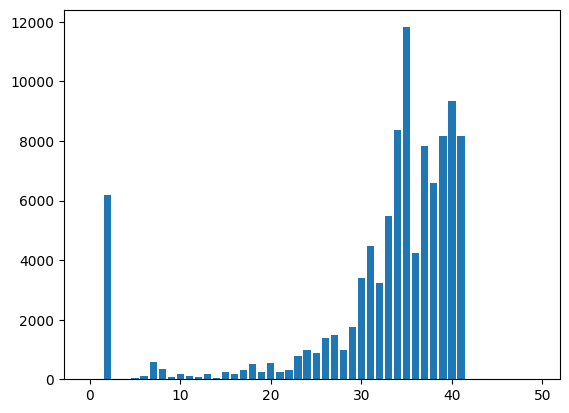

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(hist)), hist)
plt.show()

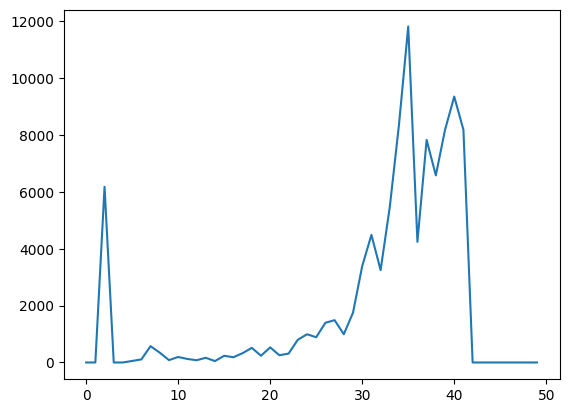

In [18]:
plt.plot(range(len(hist)), hist)
plt.show()

# Analyzing Reads

In [19]:
# Read the number of "G" or "C" in the sequence
def readgc(reads):
  gc = [0] * 100            # because there are 100 characters in each line
  total = [0] * 100         # because there are 100 characters in each line
  for read in reads:
    for i in range(len(read)):
      if read[i] == 'G' or read[i] == 'C':            # this will check the "G" or "C" in each vertical line
        gc[i] += 1
      total[i] += 1
  return gc, total

print(readgc(seqs))
gc, total = readgc(seqs)

([486, 535, 574, 569, 580, 562, 557, 563, 562, 577, 582, 547, 531, 572, 548, 546, 566, 587, 546, 548, 578, 588, 601, 594, 534, 553, 553, 577, 626, 565, 539, 579, 558, 593, 590, 578, 579, 567, 561, 599, 591, 575, 546, 549, 574, 547, 566, 593, 553, 578, 566, 579, 596, 578, 606, 576, 551, 590, 554, 568, 575, 565, 597, 539, 584, 577, 549, 581, 598, 578, 564, 553, 571, 551, 575, 548, 591, 579, 571, 572, 558, 602, 578, 582, 548, 583, 542, 570, 601, 593, 551, 594, 543, 607, 572, 598, 598, 536, 593, 561], [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000

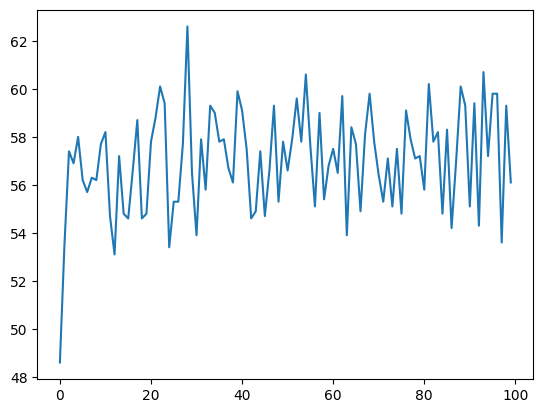

In [20]:
# Draw a graph giving the percentage of "G" or "C" in the sequence
def gcGraph(gc, total):
  for i in range(len(gc)):
    if total[i] > 0:
      gc[i] = 100.0 * gc[i] / total[i]
  plt.plot(range(len(gc)), gc)
  plt.show()

gcGraph(gc, total)

# Naive Exact Matching


In [21]:
def naiveMatch(p, t):
  occurrences = []
  for i in range(len(t) - len(p) + 1):
    match = True
    for j in range(len(p)):
      if t[i+j] != p[j]:
        match = False
        break
    if match:
      occurrences.append(i)
  return occurrences

In [22]:
t = 'ATGCTAGCTACTAGC'
p = 'TAG'
naiveMatch(p, t)

[4, 11]

# Artificial Matching

In [23]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa

genome = readGenome('phix.fa')

--2024-07-08 12:47:11--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 54.230.209.53, 54.230.209.153, 54.230.209.99, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|54.230.209.53|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘phix.fa’

phix.fa             100%[===================>]   5.40K  --.-KB/s    in 0s      

2024-07-08 12:47:11 (615 MB/s) - ‘phix.fa’ saved [5528/5528]



In [24]:
# Matching reads - Artficial Reading
def generateReads(genome, numReads, readLen):
  reads = []
  for _ in range(numReads):
    start = random.randint(0, len(genome) - readLen)
    reads.append(genome[start:start+readLen])
  return reads

reads = generateReads(genome, 10, 100)

numMatched = 0
for r in reads:
  matched = naiveMatch(r, genome)
  if len(matched) > 0:
    numMatched += 1
print('%d/%d reads matched correctly' % (numMatched, len(reads)))

10/10 reads matched correctly


# Real Reads Matching


In [25]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq

phix_reads, _ = readFastq('ERR266411_1.first1000.fastq')          # "_" because that part is not to be saved

--2024-07-08 12:47:12--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 54.230.209.53, 54.230.209.153, 54.230.209.99, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|54.230.209.53|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254384 (248K) [audio/mpeg]
Saving to: ‘ERR266411_1.first1000.fastq’

ERR266411_1.first10 100%[===================>] 248.42K  --.-KB/s    in 0.06s   

2024-07-08 12:47:12 (4.05 MB/s) - ‘ERR266411_1.first1000.fastq’ saved [254384/254384]



In [26]:
numMatched = 0
n = 0
for r in phix_reads:
  matched = naiveMatch(r, genome)
  n += 1
  if len(matched) > 0:
    numMatched += 1

print('%d/%d reads matched correctly' % (numMatched, n))

7/1000 reads matched correctly


In [27]:
# Improvised version, decreasing the read count also including the
# reverse complement function to match the compliments of the bases with the other strand

def reverseComplement(seq):
  complement = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C', 'N': 'N'}           # "N" means not sure
  return ''.join([complement[base] for base in seq[::-1]])

numMatched = 0
n = 0
for r in phix_reads:
  r = r[:20]                              # considering the first 20 characters
  matched = naiveMatch(r, genome)
  matched.extend(naiveMatch(reverseComplement(r), genome))
  n += 1
  if len(matched) > 0:
    numMatched += 1

print('%d/%d reads matched correctly' % (numMatched, n))

954/1000 reads matched correctly
